In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

sns.set(rc={'figure.figsize':(10, 10)})

# EDA

In [2]:
df = pd.read_csv('./high_diamond_ranked_10min.csv')
df.head(20)

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0   4519157822         0               28                   2               1   
1   4523371949         0               12                   1               0   
2   4521474530         0               15                   0               0   
3   4524384067         0               43                   1               0   
4   4436033771         0               75                   4               0   
5   4475365709         1               18                   0               0   
6   4493010632         1               18                   3               1   
7   4496759358         0               16                   2               0   
8   4443048030         0               16                   3               0   
9   4509433346         1               13                   1               1   
10  4452162573         0               20                   3               1   
11  4453038156         0               33                   2               1   
12  4515594785         1               18                   1               1   
13  4524924257         0               14                   3               0   
14  4516505202         1               15                   3               1   
15  4482120064         0               17                   1               0   
16  4523758462         1               14                   1               1   
17  4503636905         0               43                   3               0   
18  4486384947         1               21                   4               1   
19  4457103291         0               11                   3               0   

    blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  ...  \
0           9           6           11                  0            0  ...   
1           5           5            5                  0            0  ...   
2           7          11            4                  1            1  ...   
3           4           5            5                  1            0  ...   
4           6           6            6                  0            0  ...   
5           5           3            6                  1            1  ...   
6           7           6            7                  1            1  ...   
7           5          13            3                  0            0  ...   
8           7           7            8                  0            0  ...   
9           4           5            5                  1            1  ...   
10          4           4            6                  0            0  ...   
11         11          11            7                  1            0  ...   
12          7           1           11                  1            1  ...   
13          4           9            1                  1            0  ...   
14          4           4            4                  0            0  ...   
15          3           7            3                  0            0  ...   
16         10           2            8                  0            0  ...   
17          3           7            3                  1            0  ...   
18          5           4           11                  0            0  ...   
19          5           9            5                  0            0  ...   

    redTowersDestroyed  redTotalGold  redAvgLevel  redTotalExperience  \
0                    0         16567          6.8               17047   
1                    1         17620          6.8               17438   
2                    0         17285          6.8               17254   
3                    0         16478          7.0               17961   
4                    0         17404          7.0               18313   
5                    0         15201          7.0               18060   
6                    0         14463          6.4               15404   
7                    0         17920          6.6             

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

## Drop unnecessary columns

GoldDiff should cover Kills, Deaths, Assists, TotalGold, TotalMinionsKilled,  TotalJungleMinionsKilled, CSPerMin, GoldPerMin

ExperienceDiff should cover TotalExperience, AvgLevel

blueFirstBlood, blueExperienceDiff, blueGoldDiff should remain while the redundant red columns should be dropped

In [4]:
drop_cols = ['gameId', 'blueKills', 'blueDeaths', 'blueAssists', 'blueTotalGold', 'blueTotalMinionsKilled', 'blueCSPerMin', 'blueGoldPerMin',
             'blueTotalExperience', 'blueAvgLevel', 'redKills', 'redDeaths', 'redAssists', 'redTotalGold', 'redTotalMinionsKilled', 'redCSPerMin',
             'redGoldPerMin', 'redTotalExperience', 'redAvgLevel', 'redExperienceDiff', 'redFirstBlood', 'redGoldDiff',
             'blueTotalJungleMinionsKilled', 'redTotalJungleMinionsKilled', 'blueWins']

df_clean = df.drop(drop_cols, axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   blueWardsPlaced      9879 non-null   int64
 1   blueWardsDestroyed   9879 non-null   int64
 2   blueFirstBlood       9879 non-null   int64
 3   blueEliteMonsters    9879 non-null   int64
 4   blueDragons          9879 non-null   int64
 5   blueHeralds          9879 non-null   int64
 6   blueTowersDestroyed  9879 non-null   int64
 7   blueGoldDiff         9879 non-null   int64
 8   blueExperienceDiff   9879 non-null   int64
 9   redWardsPlaced       9879 non-null   int64
 10  redWardsDestroyed    9879 non-null   int64
 11  redEliteMonsters     9879 non-null   int64
 12  redDragons           9879 non-null   int64
 13  redHeralds           9879 non-null   int64
 14  redTowersDestroyed   9879 non-null   int64
dtypes: int64(15)
memory usage: 1.1 MB


## Examine collinearity

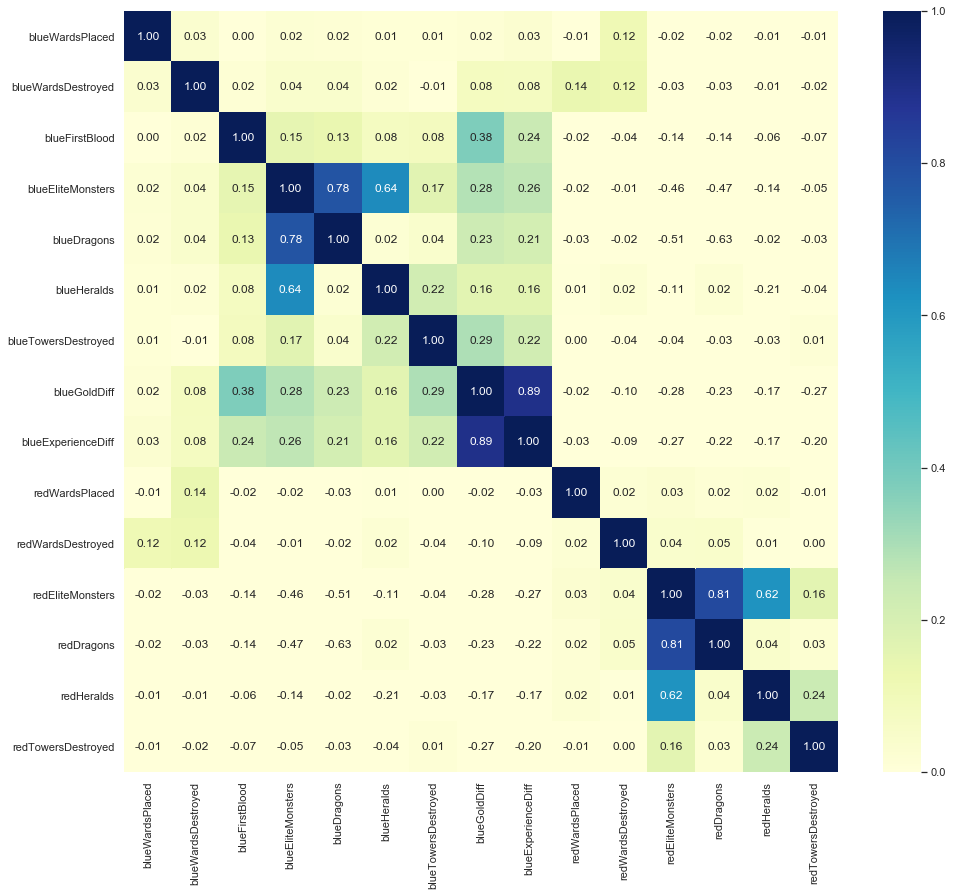

In [5]:
plt.figure(figsize=(16, 14))
sns.heatmap(df_clean.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

Dragons are highly correlated with EliteMonsters, and blueExperienceDiff is highly correlated with blueGoldDiff, so these columns should be dropped.

Heralds are moderately correlated with EliteMonsters, so they should probably be dropped as well.

Also, GoldDiff and ExperienceDiff are somewhat correlated to FirstBlood, because in the first 10 minutes of the game, the difference in experience and gold gained from obtaining the first kill on an enemy is relatively large between the two players in the role/position in which the kill happened. However, as League has 5 players per team, the difference is not as pronounced across the entire team.

Based on my knowledge of the game, the GoldDiff is generally more informative than the ExperienceDiff in a game, and ExperienceDiff typically predicts GoldDiff, so I chose to drop ExperienceDiff in favor of GoldDiff.

In [6]:
df_clean = df_clean.drop(['blueDragons', 'redDragons', 'blueHeralds', 'redHeralds', 'blueExperienceDiff'], axis=1)

In [7]:
df_clean.describe()

blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueEliteMonsters  \
count      9879.000000         9879.000000     9879.000000        9879.000000   
mean         22.288288            2.824881        0.504808           0.549954   
std          18.019177            2.174998        0.500002           0.625527   
min           5.000000            0.000000        0.000000           0.000000   
25%          14.000000            1.000000        0.000000           0.000000   
50%          16.000000            3.000000        1.000000           0.000000   
75%          20.000000            4.000000        1.000000           1.000000   
max         250.000000           27.000000        1.000000           2.000000   

       blueTowersDestroyed  blueGoldDiff  redWardsPlaced  redWardsDestroyed  \
count          9879.000000   9879.000000     9879.000000        9879.000000   
mean              0.051422     14.414111       22.367952           2.723150   
std               0.244369   2453.349179       18.457427           2.138356   
min               0.000000 -10830.000000        6.000000           0.000000   
25%               0.000000  -1585.500000       14.000000           1.000000   
50%               0.000000     14.000000       16.000000           2.000000   
75%               0.000000   1596.000000       20.000000           4.000000   
max               4.000000  11467.000000      276.000000          24.000000   

       redEliteMonsters  redTowersDestroyed  
count       9879.000000         9879.000000  
mean           0.573135            0.043021  
std            0.626482            0.216900  
min            0.000000            0.000000  
25%            0.000000            0.000000  
50%            0.000000            0.000000  
75%            1.000000            0.000000  
max            2.000000            2.000000

# Modeling

In [8]:
y = np.array(df['blueWins'])

X = np.array(df_clean)

features = df_clean.columns

## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (7903, 10)
Training Labels Shape: (7903,)
Testing Features Shape: (1976, 10)
Testing Labels Shape: (1976,)


## Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier(n_estimators = 100, random_state = 2)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# rf_pred = np.rint(rf_pred)

rf_acc = metrics.accuracy_score(y_test, rf_pred)
print('Accuracy: ' + str(rf_acc))

Accuracy: 0.7171052631578947


In [12]:
# rf_pred

### Sensitivity and Specificity

In [13]:
from sklearn.metrics import confusion_matrix
rf_cm = confusion_matrix(y_test, rf_pred)
tn, fp, fn, tp = rf_cm.ravel()

# (tn, fp, fn, tp)
print('Specificity: %f' %(tp / (tp + fp)))
print('Sensitivity: %f' %(tn / (tn + fn)))

Specificity: 0.725104
Sensitivity: 0.709486


### Confusion Matrix

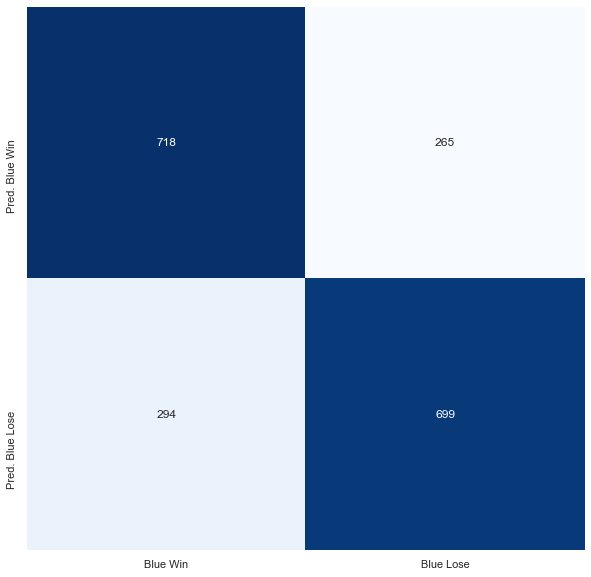

In [14]:
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Blue Win', 'Blue Lose'], yticklabels=['Pred. Blue Win', 'Pred. Blue Lose'])

### Feature Importance

In [15]:
rf_feat_imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
rf_feat_imp

blueGoldDiff           0.438613
blueWardsPlaced        0.140247
redWardsPlaced         0.139973
blueWardsDestroyed     0.087681
redWardsDestroyed      0.085475
redEliteMonsters       0.033848
blueEliteMonsters      0.031844
blueFirstBlood         0.025816
blueTowersDestroyed    0.008758
redTowersDestroyed     0.007746
dtype: float64

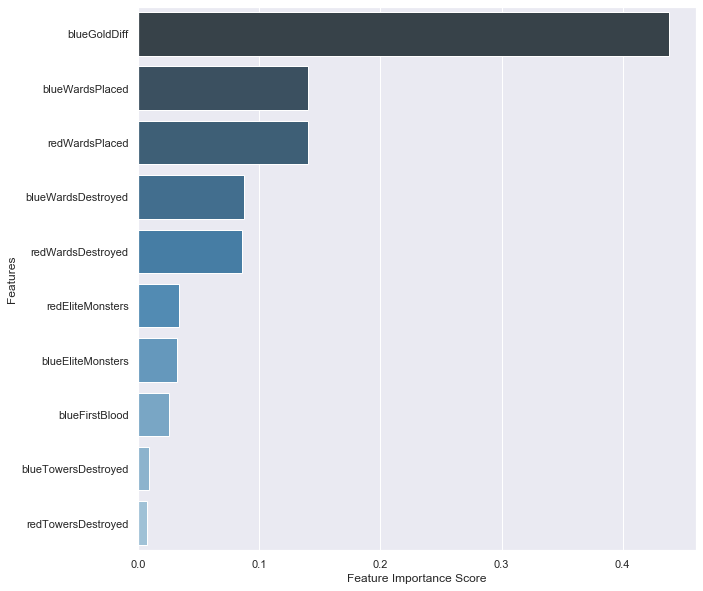

In [16]:
sns.barplot(x=rf_feat_imp, y=rf_feat_imp.index, palette="Blues_d")

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

It seems that blueGoldDiff is by far the most predictive feature of the ones we have included. By comparison, TowersDestroyed, FirstBlood, and EliteMonsters seem relatively unhelpful in the prediction. I suspect that this is the case because the data only shows statistics from the first 10 minutes in game, and games typically take upwards of 30 minutes to finish. In my experience, there aren't even many games where a large number of towers are destroyed and elite monsters are killed within the first 10 minutes. Despite tower destruction and elite monster slaying granting gold and buffs to players, even if they do occur, the game state is inherently such that events like these don't put one side at an overwhelming advantage.

This means that we may have to consider features that we initially threw out, such as MinionsKilled. Despite my initial thoughts that this number would be heavily correlated with GoldDiff, it may be more nuanced. It is a fact that better, more skilled players are able to kill more minions than less skilled players. Thus, a possible sign that an individual player is overall *more skilled* than their opponent is their MinionsKilled or CSPerMin number. However, we only have these stats for the teams as a whole. In terms of gauging the overall skill level of a team, a team with more individually skilled players is on average, more skilled than their opponent. Let's explore whether looking at MinionsKilled (CSPerMin is essentially identical, just presented as a rate) will improve the accuracy of the model.

A note about JungleMinionsKilled: the Jungle role in League of Legends is perhaps the most difficult to examine in terms of contribution to a teams win. There are several ways in which the jungler can provide their team an advantage - killing jungle minions to obtain more gold so as to be more useful later in the game (JungleMinionsKilled), controlling objectives such as Elite Monsters (EliteMonsters, Heralds, Dragons), and helping teammates kill their opponents (Kills, Gold, etc.), and this is dependent on the archetype of the character that the jungler chooses to play. For now, lets re-include JungleMinionsKilled, as it is the stat that most directly correlates with how strong the jungler is (killing more jungle minions adds gold and experience in the most direct way possible to junglers).

# EDA - Part 2

In [17]:
drop_cols = ['gameId', 'blueKills', 'blueDeaths', 'blueAssists', 'blueTotalGold', 'blueCSPerMin', 'blueGoldPerMin',
             'blueTotalExperience', 'blueAvgLevel', 'redKills', 'redDeaths', 'redAssists', 'redTotalGold', 'redCSPerMin',
             'redGoldPerMin', 'redTotalExperience', 'redAvgLevel', 'redExperienceDiff', 'redFirstBlood', 'redGoldDiff', 
             'blueTowersDestroyed', 'redTowersDestroyed', 'blueFirstBlood', 'blueWins']

df_clean = df.drop(drop_cols, axis=1)
df_clean = df_clean.drop(['blueDragons', 'redDragons', 'blueHeralds', 'redHeralds', 'blueExperienceDiff',
                          'blueEliteMonsters', 'redEliteMonsters'], axis=1)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   blueWardsPlaced               9879 non-null   int64
 1   blueWardsDestroyed            9879 non-null   int64
 2   blueTotalMinionsKilled        9879 non-null   int64
 3   blueTotalJungleMinionsKilled  9879 non-null   int64
 4   blueGoldDiff                  9879 non-null   int64
 5   redWardsPlaced                9879 non-null   int64
 6   redWardsDestroyed             9879 non-null   int64
 7   redTotalMinionsKilled         9879 non-null   int64
 8   redTotalJungleMinionsKilled   9879 non-null   int64
dtypes: int64(9)
memory usage: 694.7 KB


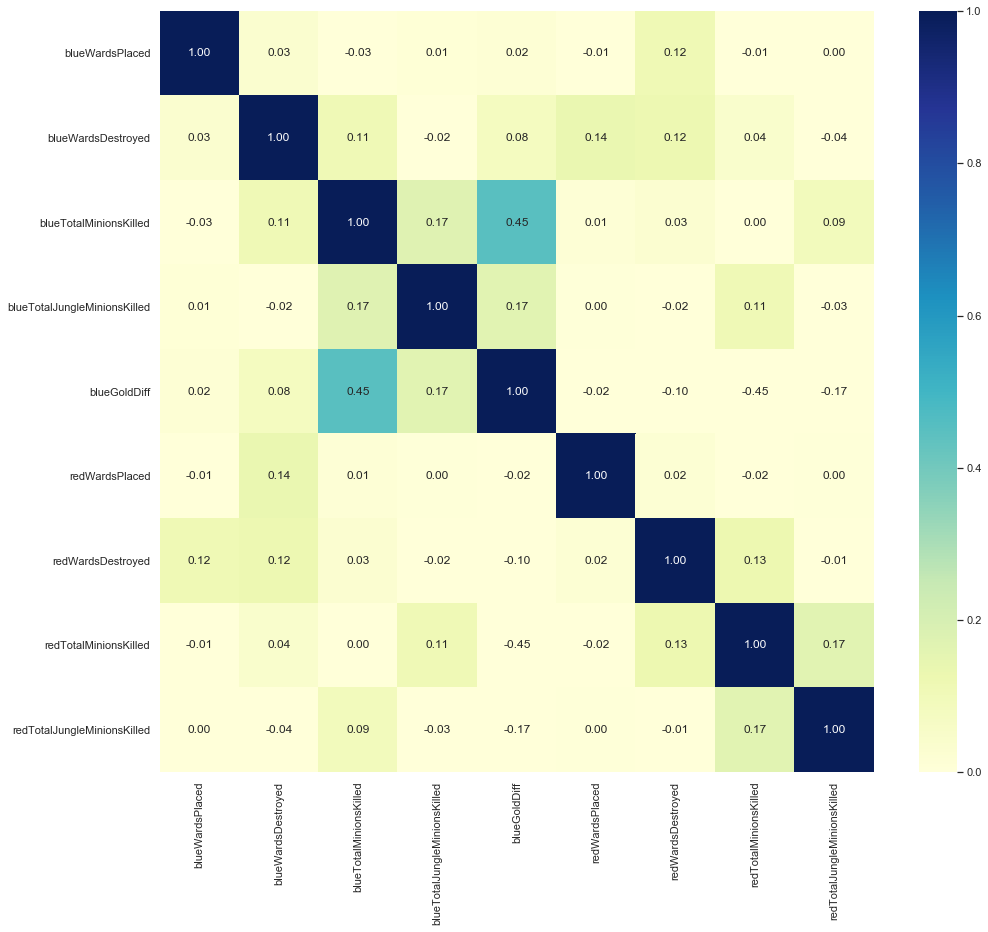

In [18]:
plt.figure(figsize=(16, 14))
sns.heatmap(df_clean.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

In [19]:
df_clean.describe()

blueWardsPlaced  blueWardsDestroyed  blueTotalMinionsKilled  \
count      9879.000000         9879.000000             9879.000000   
mean         22.288288            2.824881              216.699565   
std          18.019177            2.174998               21.858437   
min           5.000000            0.000000               90.000000   
25%          14.000000            1.000000              202.000000   
50%          16.000000            3.000000              218.000000   
75%          20.000000            4.000000              232.000000   
max         250.000000           27.000000              283.000000   

       blueTotalJungleMinionsKilled  blueGoldDiff  redWardsPlaced  \
count                   9879.000000   9879.000000     9879.000000   
mean                      50.509667     14.414111       22.367952   
std                        9.898282   2453.349179       18.457427   
min                        0.000000 -10830.000000        6.000000   
25%                       44.000000  -1585.500000       14.000000   
50%                       50.000000     14.000000       16.000000   
75%                       56.000000   1596.000000       20.000000   
max                       92.000000  11467.000000      276.000000   

       redWardsDestroyed  redTotalMinionsKilled  redTotalJungleMinionsKilled  
count        9879.000000            9879.000000                  9879.000000  
mean            2.723150             217.349226                    51.313088  
std             2.138356              21.911668                    10.027885  
min             0.000000             107.000000                     4.000000  
25%             1.000000             203.000000                    44.000000  
50%             2.000000             218.000000                    51.000000  
75%             4.000000             233.000000                    57.000000  
max            24.000000             289.000000                    92.000000

# Modeling - Part 2

In [20]:
y = np.array(df['blueWins'])

X = np.array(df_clean)

features = df_clean.columns

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (7903, 9)
Training Labels Shape: (7903,)
Testing Features Shape: (1976, 9)
Testing Labels Shape: (1976,)


## Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier(n_estimators = 100, random_state = 2)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# rf_pred = np.rint(rf_pred)

rf_acc = metrics.accuracy_score(y_test, rf_pred)
print('Accuracy: ' + str(rf_acc))

Accuracy: 0.715080971659919


### Sensitivity and Specificity

In [24]:
from sklearn.metrics import confusion_matrix
rf_cm = confusion_matrix(y_test, rf_pred)
tn, fp, fn, tp = rf_cm.ravel()

# (tn, fp, fn, tp)
print('Specificity: %f' %(tp / (tp + fp)))
print('Sensitivity: %f' %(tn / (tn + fn)))

Specificity: 0.724426
Sensitivity: 0.706287


#### Previous
Accuracy: 0.7171052631578947

Specificity: 0.725104

Sensitivity: 0.709486

#### New
Accuracy: 0.715080971659919

Specificity: 0.724426

Sensitivity: 0.706287

### Confusion Matrix

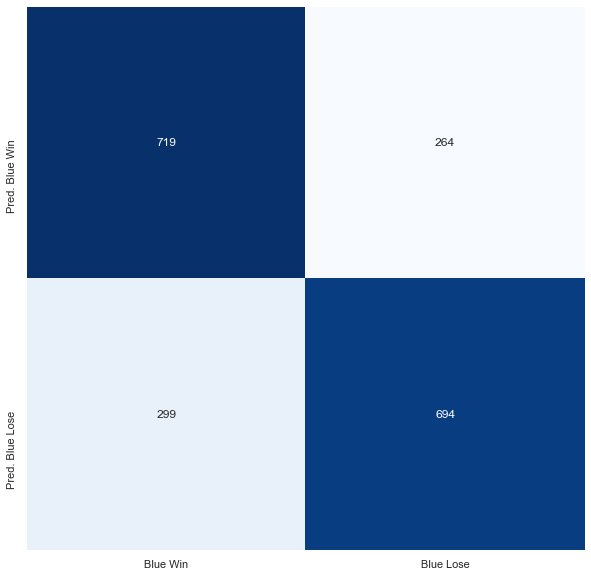

In [25]:
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Blue Win', 'Blue Lose'], yticklabels=['Pred. Blue Win', 'Pred. Blue Lose'])

Turns out that after reconsidering some features, this model very slightly underperforms in comparison to the initial random forest classifier I did

In [26]:
rf_feat_imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
rf_feat_imp

blueGoldDiff                    0.350190
blueTotalMinionsKilled          0.110562
redTotalMinionsKilled           0.110319
blueTotalJungleMinionsKilled    0.088591
redTotalJungleMinionsKilled     0.083877
blueWardsPlaced                 0.077989
redWardsPlaced                  0.077904
redWardsDestroyed               0.050431
blueWardsDestroyed              0.050136
dtype: float64

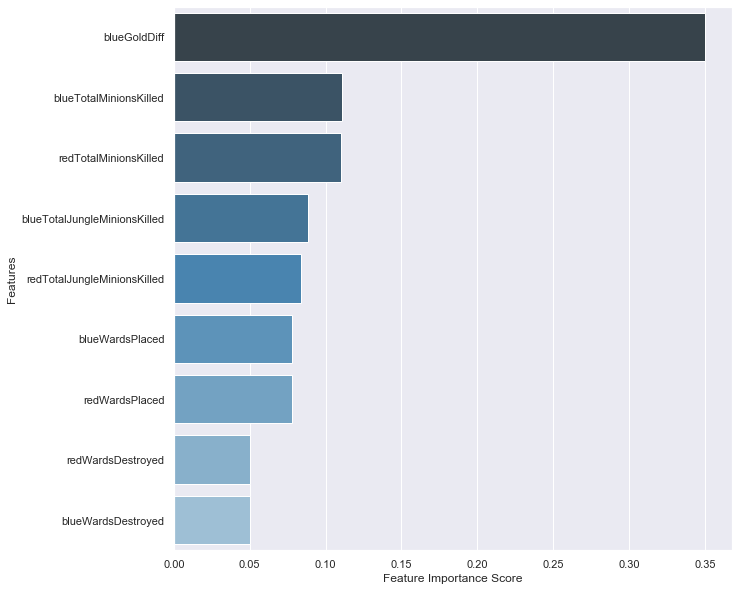

In [27]:
sns.barplot(x=rf_feat_imp, y=rf_feat_imp.index, palette="Blues_d")

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [28]:
# Extract single tree
estimator = rf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names=features,
                class_names=['blueLose', 'blueWin'],
                precision=2, filled=True)


import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')


# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

## TODO: Other Models
- Naive Bayes
- K-nearest neighbors
- Logistic Regression

# PCA

In [29]:
y = df['blueWins']
X = df_clean

from sklearn import preprocessing 

X = preprocessing.StandardScaler().fit_transform(X)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.19276201 0.14657187]


In [31]:
df_vis = pd.DataFrame(data = components, columns = ['pc1', 'pc2'])
df_vis = pd.concat([df_vis, df['blueWins']], axis = 1)
X = df_vis[['pc1', 'pc2']]
y = df_vis['blueWins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [33]:
from matplotlib.colors import ListedColormap
def DecisionBoundary(rf):
    X = df_vis[['pc1', 'pc2']]
    y = df_vis['blueWins']
    
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    #Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

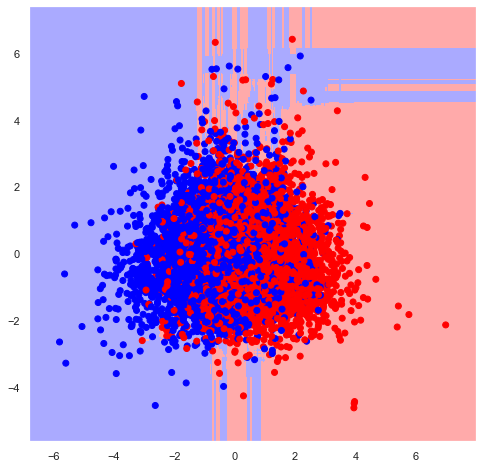

In [34]:
DecisionBoundary(rf)